<a href="https://colab.research.google.com/github/Orange314159/DataScience/blob/main/MattRobsU2proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Success Rate of a Subjects Sleep

**Context:**

The topic that I selected was the sleep of a subject and if they were successful (got 8+ hrs of sleep) every night. This data comes from a project that I started with a group of friends in our quest to achive acceptable sleep while getting through the homework at LASA. I think that this set is particullarly intresting because of the importance in getting enough sleep, and because our current data models only include averages and splits based on days of the week, but we have no way for a projection method at this point.

In [6]:
!pip install preliz

## Imports ##
import preliz as pz
import numpy  as np
import arviz  as az
import pymc   as pm
import polars as pl




In [7]:
## Uniform Distribution ##
# pz.Uniform(0,1).plot_pdf() # plots the uniform distribution
#
# We will not use this distribuition as it takes in none of the information that
# we have about this phenomena.



## Prior
We allow our prior to be that 25% of the time the subject will have enough sleep. In order to form this prior, I looked at the cognative attentiveness and other signs of lack of sleep, based on the CDC recomendations. In addition, the point of 8hrs as the cutoff for good sleep was also based on CDC recomendations for the ammount of lseep for hte subject. We will use 2 and 6 as our prior for success and failure because we little faith in this prior, given that it is based on human "behavior which has many factors.

<Axes: >

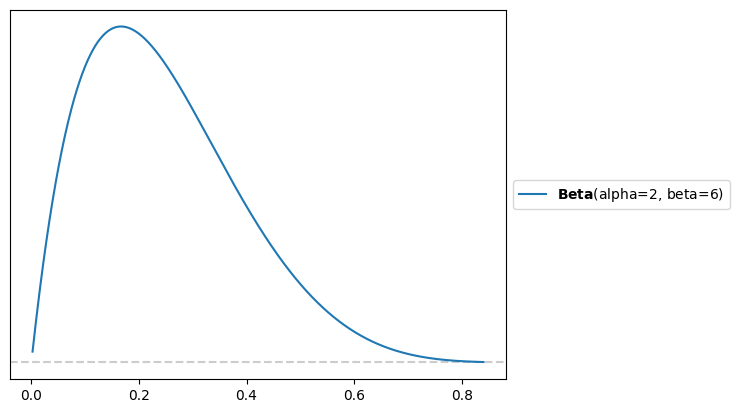

In [8]:
a = 2
b = 6

## Beta-Binomial Distribution ##
pz.Beta(alpha=a,beta=b).plot_pdf()

## Likelihood
While this analytical model is intresting, it could be more helpful to use a different model that uses actual information, rather than just a prior based on little. For this I will include information from our subject's sleep over approximately the past year.

In [ ]:
# Using Polars, import the sleep data (a table of 1s and 0s with width of 7)
sleepData = pl.read_csv("/content/drive/MyDrive/UnitTwoProjectDataSet.csv")

# Let total sleep be the number of days that the subject was able to sleep over 8 hours
# Let number of days be the number of days that the subject's sleep was studied
totalSleep = sleepData.sum().sum_horizontal()[0]
numberOfDays = sleepData.shape[0]*sleepData.shape[1] - 3
# there are three empty cells at the end of my data so I subtract three as to not count them

# this serves mostly as debug, but is intresting to consider
print("Total sleep: ", totalSleep, " Number of Days: ", numberOfDays)

k = totalSleep
n = numberOfDays

#the success we have seen
FT_success = np.repeat(1, k)

#the failure we have seen
FT_failure = np.repeat(0, n-k)

#combine makes and misses into one array
FT_data = np.concatenate( [FT_success,FT_failure] )

# our general pm model from the notes
with pm.Model() as wmby_FT_model:
  θ = pm.Beta('θ' , alpha = a, beta = b)
  y = pm.Bernoulli('y', p = θ, observed = FT_data)
  idata_FT = pm.sample()

# now plot the posterior based on our prior and liklihood
# az.plot_posterior(idata_FT)


<Axes: title={'center': 'θ'}>

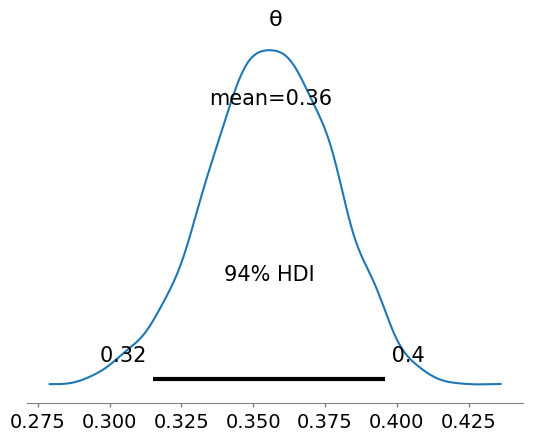

In [11]:
az.plot_posterior(idata_FT)

## Conclusion

Based on this PyMc model, we find that we have a 94% chance to find our true sleep success to be between 0.32 and 0.39. This would suggest that my prior was slightly wrong, as I predicted a 25% success rate on the subject's sleep. Additionally, we would find the sleep to most commonly be successful 36% of the time.